In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

sepal_length = np.array(features[:, 0])
petal_width = np.array(features[:, 3])

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

Text(0, 0.5, 'Petal Width')

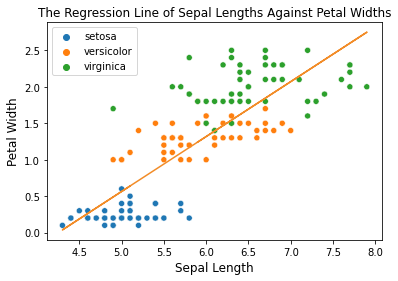

In [5]:
reg = LinearRegression().fit(X = sepal_length.reshape(-1,1), y = petal_width.reshape(-1,1))

sns.scatterplot(x = sepal_length, y = petal_width, hue = species_names)

plt.plot(
    sepal_length, 
    reg.intercept_[0] + reg.coef_[0][0] * features[:, 0], 
    color = '#f28c28'
)

plt.title("The Regression Line of Sepal Lengths Against Petal Widths")
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)

In [6]:
print(reg.intercept_, reg.coef_)

[-3.200215] [[0.75291757]]


From the result above, it tells us two things:
* The intercept starts at $-3.200215$
* The first coefficient is $0.75291757$

So in this case, our regression formula is $y = -3.200215 + 0.75291757 \cdot x_i$.

In [7]:
lr_predictions = reg.predict(sepal_length.reshape(-1,1))
lr_mse = mean_squared_error(lr_predictions, petal_width)
print(f"Linear Regression's MSE is {lr_mse}")

Linear Regression's MSE is 0.19101500769427357


With $y = -3.200215 + 0.75291757 \cdot x_i$, the Mean Squared error is $0.1910150076942736$.

# 1. Gradient Descent

In [8]:
def predict(intercept, coefficient, dataset):
    return np.array([intercept + coefficient * x for x in dataset])

def gd(x, y, epochs, df, alpha = 0.01):
    length = len(x)
    intercept, coefficient = 0.0, 0.0
    for epoch in range(epochs):
        sum_error = 0.0
        predictions = predict(intercept, coefficient, x)
        b0_error = (1/length) * np.sum(predictions - y)
        b1_error = (1/length) * np.sum((predictions - y) * x)
        intercept = intercept - alpha * b0_error
        coefficient = coefficient - alpha * b1_error 
        sum_error = sum_error + np.sum((predictions - y) ** 2) / (2 * length)
        df.loc[epoch] = [intercept, coefficient, sum_error]
    return df

def scatter_plot_with_regression_line(gd, at):
    intercept = gd['intercept'][at-1]
    coefficient = gd['coefficient'][at-1]
    
    plt.figure(figsize=(6,5))
    
    sns.scatterplot(
        x = sepal_length, 
        y = petal_width, 
        hue = species_names
    )
    plt.plot(
        sepal_length, 
        intercept + coefficient * sepal_length,
        color = '#f28c28'
    )
    plt.title(f"intercept = {intercept:.2f} and coefficient = {coefficient:.2f}")

def calculate_mse(gd_loss, at):
    gd_predictions = [gd_loss['intercept'][at-1] + gd_loss['coefficient'][at-1] * x for x in sepal_length]
    gd_mse = mean_squared_error(
        gd_predictions, 
        petal_width
    )
    print(f"The MSE is {gd_mse} after {len(gd_loss)}")

Let's train, or update the weight of our parameters, for 10,000 times.

In [9]:
gd_loss = pd.DataFrame(columns=['intercept', 'coefficient', 'sum_error'])
gd_loss = gd(sepal_length, petal_width, epochs = 10000, df = gd_loss)

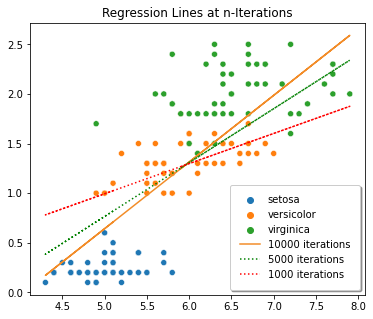

In [10]:
plt.figure(figsize=(6,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][9999] + gd_loss['coefficient'][9999] * sepal_length,
    '#f28c28',
    label = '10000 iterations'
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][4999] + gd_loss['coefficient'][4999] * sepal_length,
    ':g',
    label = '5000 iterations'
)

plt.plot(
    sepal_length, 
    gd_loss['intercept'][999] + gd_loss['coefficient'][999] * sepal_length,
    ':r',
    label = '1000 iterations'
)

plt.title("Regression Lines at n-Iterations")

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

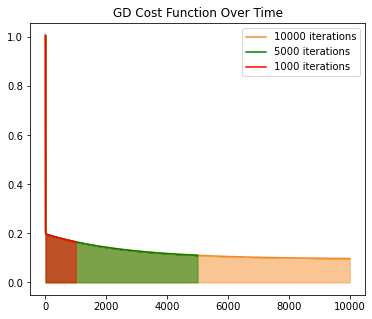

In [15]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(0, 10000), gd_loss['sum_error'][:10000], color = '#f28c28', label = '10000 iterations')
plt.fill_between(np.arange(0, 10000), gd_loss['sum_error'][:10000], step="pre", alpha = 0.5, color = '#f28c28')

plt.plot(np.arange(0, 5000), gd_loss['sum_error'][:5000], color = 'green', label = '5000 iterations')
plt.fill_between(np.arange(0, 5000), gd_loss['sum_error'][:5000], step="pre", alpha = 0.5, color = 'green')

plt.plot(np.arange(0, 1000), gd_loss['sum_error'][:1000], color = 'red', label = '1000 iterations')
plt.fill_between(np.arange(0, 1000), gd_loss['sum_error'][:1000], step="pre", alpha = 0.5, color = 'red')

plt.title(f'GD Cost Function Over Time')
plt.legend()

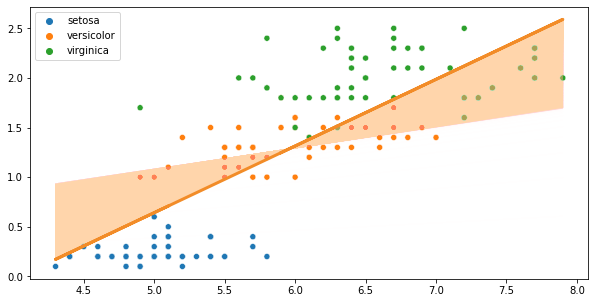

In [11]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

for i in range(0, 9999):
    plt.plot(
        sepal_length, 
        gd_loss['intercept'].loc[i] + gd_loss['coefficient'].loc[i] * sepal_length,
        color = '#ffd5ab',
        linestyle = '-',
        lw = 1,
        alpha = 0.01
    )

plt.plot(
    sepal_length, 
    gd_loss['intercept'].loc[9999] + gd_loss['coefficient'].loc[9999] * sepal_length,
    color = '#f28c28',
    lw = 3,
    linestyle = '-'
)

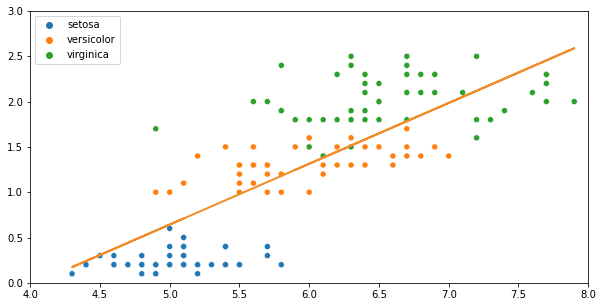

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim(4.0, 8.0)
ax.set_ylim(0.0, 3.0)

sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

line, = ax.plot(sepal_length, gd_loss['intercept'][0] + gd_loss['coefficient'][0] * sepal_length,color="#f28c28", linestyle='-', linewidth = 2)
def update(frame_num):
    line.set_ydata(
        gd_loss['intercept'].loc[frame_num] + gd_loss['coefficient'].loc[frame_num] * sepal_length
    )
    return line, ax

anim = FuncAnimation(fig, update, repeat = True, frames=np.arange(0, 10000, 50), interval=10)
anim.save('./animation.gif', writer='imagemagick', fps=60)
plt.show()